Имеется датасет, содержащий информацию о системе проката велосипедов. Датасет включает следующие данные:

season - время года (1 - весна, 2 - лето, 3 - осень, 4 - зима);
holiday	- праздничный день (0 - праздничный, 1 - обычный);
workingday - будний день (0 - выходнойб 1 - будний);
weather	- погодные условия (по шкале от 1 до 4);
temp - температура воздуха;
atemp - средняя температура;
humidity - осадки;
windspeed - скорость ветра;
casual - количество незарегистрированных велосипедов;
registered - количество зарегистрированных велосипедов;
count - общее количество арендованных велосипедов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Bike_sharing_demand.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Целевой признак исследования - count. Признаки registerd и casual, по сути являющиеся составными частями count, мы рассматривать не будем. Удалим эти параметры:

In [2]:
df = df.drop(['datetime', 'casual', 'registered'], axis=1) 
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,0,0,1,9.02,13.635,80,0.0,40
2,1,0,0,1,9.02,13.635,80,0.0,32
3,1,0,0,1,9.84,14.395,75,0.0,13
4,1,0,0,1,9.84,14.395,75,0.0,1


Для того, чтобы проводимый анализ был более точным, нам необходимо убедиться в чистоте данных. Проверяем данные на наличие отсутствующих значений:

In [3]:
pd.isnull(df).sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

Теперь мы можем посмотреть на то, как данные коррелируют между собой:

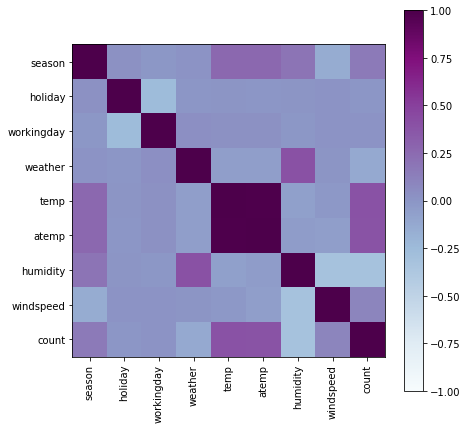

In [4]:
corr = df.corr()

def corr_plot(data):
    
    labels = [c for c in data.columns]
    fig, ax = plt.subplots(figsize=(7, 7))
    
    plt.xticks(rotation=90)
    
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticks(np.arange(len(labels)))
    
    ax.set_yticklabels(labels)
    ax.set_xticklabels(labels)
    
    plt.imshow(data, cmap='BuPu', vmin=-1, vmax=1)
    plt.colorbar()
    
corr_plot(corr)

Посмотрим на то, как целевой признак зависит от остальных:

In [5]:
count_corr = df.corr().filter(['count']).drop(['count'])
count_corr.sort_values(['count'])

,count
humidity,-0.317371
weather,-0.128655
holiday,-0.005393
workingday,0.011594
windspeed,0.101369
season,0.163439
atemp,0.389784
temp,0.394454


Визуализируем полученные данные:

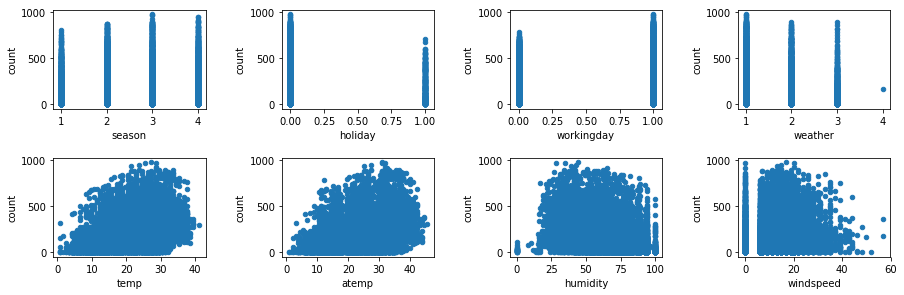

In [6]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axes_list = [item for sublist in axes for item in sublist]

features = [c for c in df.columns[:-1]]

for feature in features:
    df.plot(feature, 'count', kind='scatter', subplots='True', ax = axes_list.pop(0))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
for ax in axes_list:
    ax.remove()

Из построенных графиков видно, что целевой признак имеет линейную зависимость от некоторых признаков. Убедимся в этом, визуализировав данные:

Text(0, 0.5, 'count')

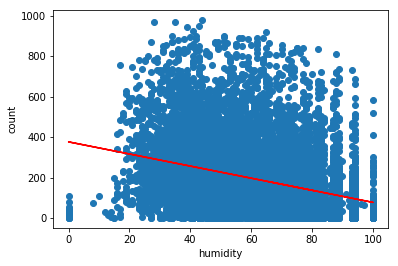

In [7]:
from scipy import stats

x = df['humidity'].values
y = df['count'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r')

plt.xlabel('humidity')
plt.ylabel('count')
